https://www.geeksforgeeks.org/generative-adversarial-networks-gans-in-pytorch/

Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


Define generator function

In [2]:
# Generator
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.noise_dim = noise_dim
        self.main = nn.Sequential(
            nn.Linear(noise_dim, 7*7*256),
            nn.ReLU(True),
            nn.Unflatten(1, (256, 7, 7)),
            nn.ConvTranspose2d(256, 128, 5, stride=1, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)


Define Discriminator

In [3]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self): 
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, 5, stride=2, padding=2), # 28 -> 14, channel 1 -> 64
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, 5, stride=2, padding=2), # 14 -> 7, channel 64 -> 128
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(128),
            nn.Flatten(), # 7*7*128, flatten
            nn.Linear(7*7*128, 1) # 7*7*128 -> 1
        )

    def forward(self, x):
        return self.main(x)
    


Combine the Generator and Discriminator Function

In [4]:
# Noise dimension
NOISE_DIM = 100

# Generator and Discriminator
generator = Generator(NOISE_DIM)
discriminator = Discriminator()


Device Config

In [5]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator = generator.to(device)
discriminator = discriminator.to(device)

In [6]:
print('Using device:', device)

Using device: cuda


Set Loss Function, Optimizer, and Hyperparameters

In [7]:
# Loss Function
criterion = nn.BCELoss()

# Optimizers
generator_optimizer = optim.Adam(generator.parameters(),
                                  lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(),
                                      lr=0.0002, betas=(0.5, 0.999))

# Training hyperparameters
NUM_EPOCHS = 100
BATCH_SIZE = 256

Data Loader

In [8]:
# DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transform,
                                             download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                             batch_size=BATCH_SIZE, 
                                             shuffle=True)

Generate Images

In [9]:
# Generate images
def generate_images(model, noise): 
    model.eval()
    with torch.no_grad():
        fake_images = model(noise).cpu()
        fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)

        # create a grid of images with 1 row and noise.size(0) columns
        fig = plt.figure(figsize=(25, 25))
        for i in range(fake_images.size(0)):
            plt.subplot(1, noise.size(0), i+1)
            plt.imshow(fake_images[i][0], cmap='gray')
            plt.axis('off')

        plt.show()


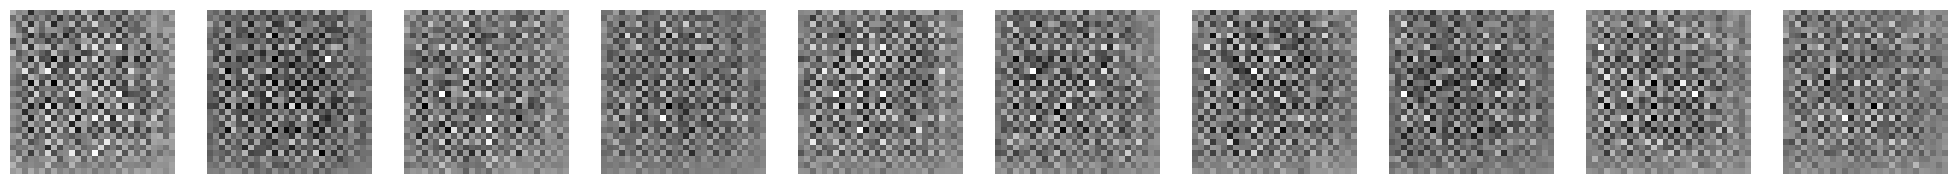

In [10]:
# Generate test noise
test_noise = torch.randn(10, NOISE_DIM).to(device)
generate_images(generator, test_noise)

Training Process

Epoch [1/100], Discriminator Loss: 0.0040, Generator Loss: 6.2756
Epoch [2/100], Discriminator Loss: 0.0009, Generator Loss: 7.7668
Epoch [3/100], Discriminator Loss: 0.0005, Generator Loss: 8.9217
Epoch [4/100], Discriminator Loss: 0.0003, Generator Loss: 10.0119
Epoch [5/100], Discriminator Loss: 0.0003, Generator Loss: 8.9990
Epoch [6/100], Discriminator Loss: 0.0006, Generator Loss: 8.5007
Epoch [7/100], Discriminator Loss: 0.0003, Generator Loss: 9.5902
Epoch [8/100], Discriminator Loss: 0.0001, Generator Loss: 10.1378
Epoch [9/100], Discriminator Loss: 0.0001, Generator Loss: 10.5345
Epoch [10/100], Discriminator Loss: 0.0001, Generator Loss: 10.8438


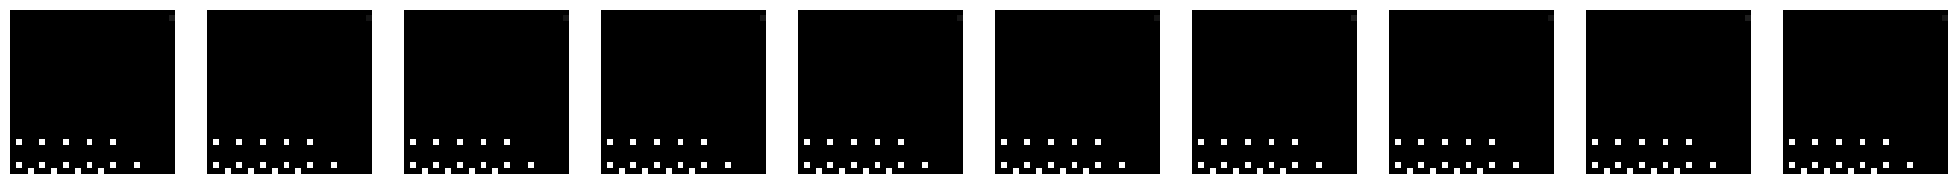

Epoch [11/100], Discriminator Loss: 0.0001, Generator Loss: 11.1023
Epoch [12/100], Discriminator Loss: 0.0001, Generator Loss: 11.3269
Epoch [13/100], Discriminator Loss: 0.0001, Generator Loss: 11.5322
Epoch [14/100], Discriminator Loss: 0.0000, Generator Loss: 11.6840
Epoch [15/100], Discriminator Loss: 0.0000, Generator Loss: 11.8697
Epoch [16/100], Discriminator Loss: 0.0001, Generator Loss: 12.0403
Epoch [17/100], Discriminator Loss: 0.0000, Generator Loss: 12.1993
Epoch [18/100], Discriminator Loss: 0.0000, Generator Loss: 12.3526
Epoch [19/100], Discriminator Loss: 0.0000, Generator Loss: 12.5010
Epoch [20/100], Discriminator Loss: 0.0000, Generator Loss: 12.6455


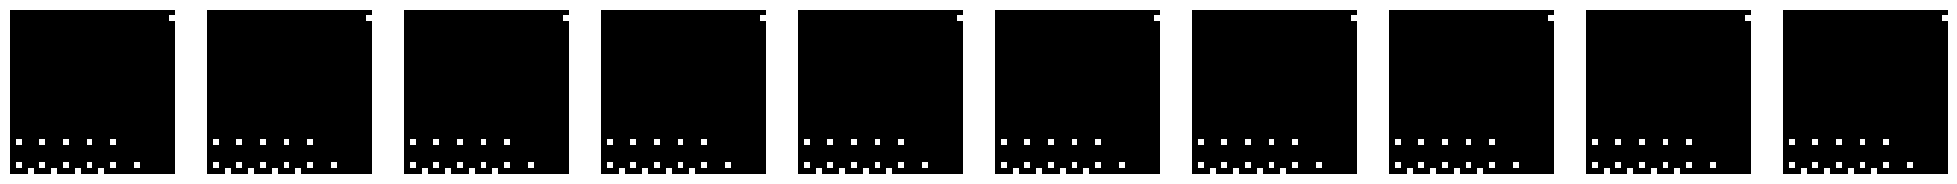

Epoch [21/100], Discriminator Loss: 0.0000, Generator Loss: 12.7861
Epoch [22/100], Discriminator Loss: 0.0000, Generator Loss: 12.9247
Epoch [23/100], Discriminator Loss: 0.0000, Generator Loss: 13.0597
Epoch [24/100], Discriminator Loss: 0.0000, Generator Loss: 13.1922
Epoch [25/100], Discriminator Loss: 0.0000, Generator Loss: 13.3223
Epoch [26/100], Discriminator Loss: 0.0000, Generator Loss: 13.4511
Epoch [27/100], Discriminator Loss: 0.0000, Generator Loss: 13.5801
Epoch [28/100], Discriminator Loss: 0.0000, Generator Loss: 13.7064
Epoch [29/100], Discriminator Loss: 0.0000, Generator Loss: 13.8342
Epoch [30/100], Discriminator Loss: 0.0000, Generator Loss: 13.4726


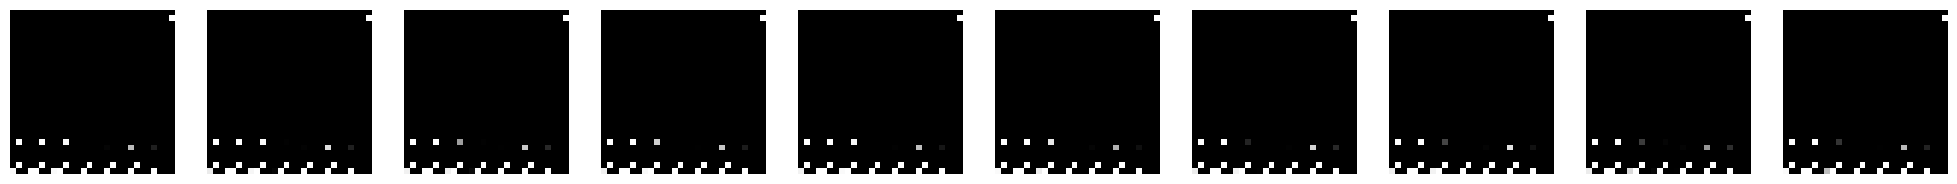

Epoch [31/100], Discriminator Loss: 0.0000, Generator Loss: 23.1650
Epoch [32/100], Discriminator Loss: 0.0000, Generator Loss: 23.0746
Epoch [33/100], Discriminator Loss: 0.0000, Generator Loss: 23.0213
Epoch [34/100], Discriminator Loss: 0.0000, Generator Loss: 22.9818
Epoch [35/100], Discriminator Loss: 0.0000, Generator Loss: 22.9508
Epoch [36/100], Discriminator Loss: 0.0000, Generator Loss: 22.9250
Epoch [37/100], Discriminator Loss: 0.0000, Generator Loss: 22.9013
Epoch [38/100], Discriminator Loss: 0.0000, Generator Loss: 22.8789
Epoch [39/100], Discriminator Loss: 0.0000, Generator Loss: 22.8591
Epoch [40/100], Discriminator Loss: 0.0000, Generator Loss: 22.8412


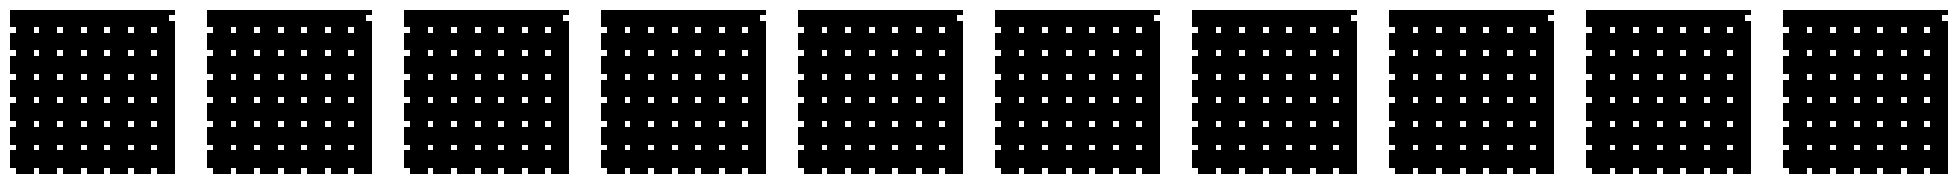

Epoch [41/100], Discriminator Loss: 0.0000, Generator Loss: 22.8243
Epoch [42/100], Discriminator Loss: 0.0000, Generator Loss: 22.8081
Epoch [43/100], Discriminator Loss: 0.0000, Generator Loss: 22.7925
Epoch [44/100], Discriminator Loss: 0.0000, Generator Loss: 22.7779
Epoch [45/100], Discriminator Loss: 0.0000, Generator Loss: 22.7637
Epoch [46/100], Discriminator Loss: 0.0000, Generator Loss: 22.7496
Epoch [47/100], Discriminator Loss: 0.0000, Generator Loss: 22.7361
Epoch [48/100], Discriminator Loss: 0.0000, Generator Loss: 22.7230
Epoch [49/100], Discriminator Loss: 0.0000, Generator Loss: 22.7108
Epoch [50/100], Discriminator Loss: 0.0000, Generator Loss: 22.6984


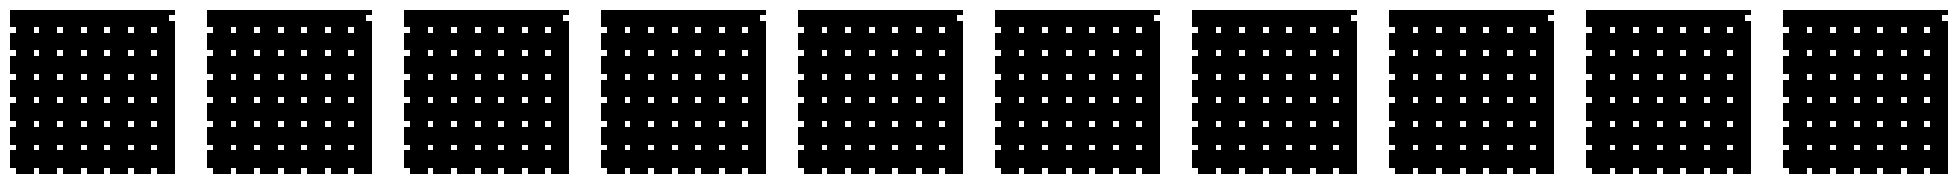

Epoch [51/100], Discriminator Loss: 0.0000, Generator Loss: 22.6864
Epoch [52/100], Discriminator Loss: 0.0000, Generator Loss: 22.6749
Epoch [53/100], Discriminator Loss: 0.0000, Generator Loss: 22.6647
Epoch [54/100], Discriminator Loss: 0.0000, Generator Loss: 22.6540
Epoch [55/100], Discriminator Loss: 0.0000, Generator Loss: 22.6441
Epoch [56/100], Discriminator Loss: 0.0000, Generator Loss: 22.6345
Epoch [57/100], Discriminator Loss: 0.0000, Generator Loss: 22.6247
Epoch [58/100], Discriminator Loss: 0.0000, Generator Loss: 22.6152
Epoch [59/100], Discriminator Loss: 0.0000, Generator Loss: 22.6058
Epoch [60/100], Discriminator Loss: 0.0000, Generator Loss: 22.5967


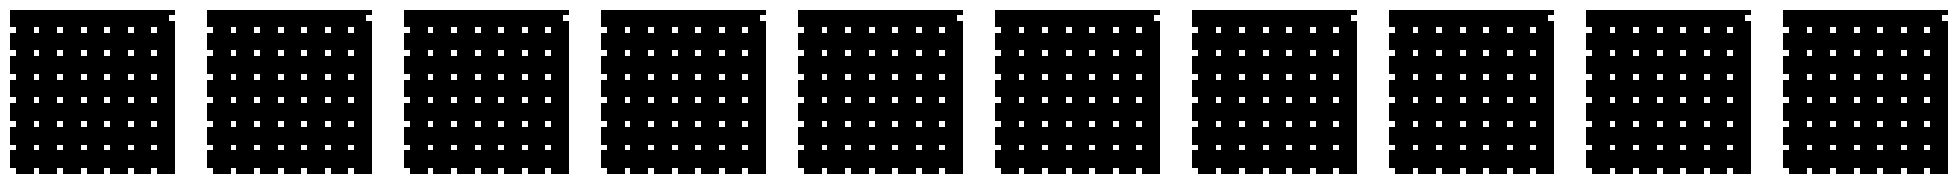

Epoch [61/100], Discriminator Loss: 0.0000, Generator Loss: 22.5869
Epoch [62/100], Discriminator Loss: 0.0000, Generator Loss: 22.5786
Epoch [63/100], Discriminator Loss: 0.0000, Generator Loss: 22.5701
Epoch [64/100], Discriminator Loss: 0.0000, Generator Loss: 22.5611
Epoch [65/100], Discriminator Loss: 0.0000, Generator Loss: 22.5533
Epoch [66/100], Discriminator Loss: 0.0000, Generator Loss: 22.5459
Epoch [67/100], Discriminator Loss: 0.0000, Generator Loss: 22.5386
Epoch [68/100], Discriminator Loss: 0.0000, Generator Loss: 22.5317
Epoch [69/100], Discriminator Loss: 0.0000, Generator Loss: 22.5253
Epoch [70/100], Discriminator Loss: 0.0000, Generator Loss: 22.5193


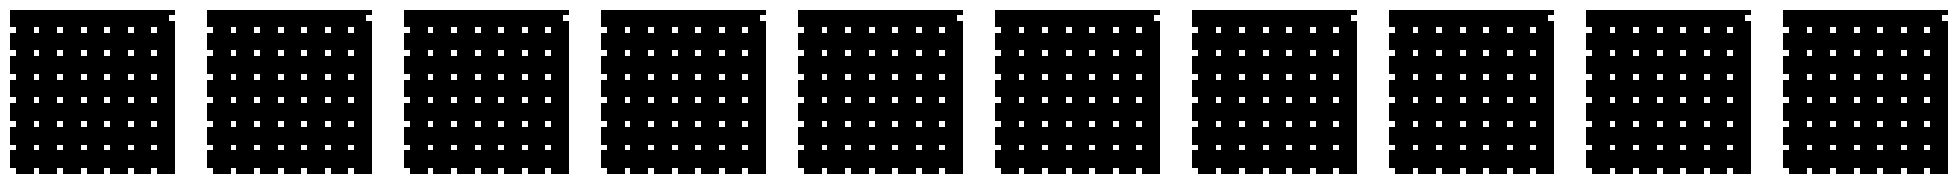

Epoch [71/100], Discriminator Loss: 0.0000, Generator Loss: 22.5137
Epoch [72/100], Discriminator Loss: 0.0000, Generator Loss: 22.5095
Epoch [73/100], Discriminator Loss: 0.0000, Generator Loss: 22.5060
Epoch [74/100], Discriminator Loss: 0.0000, Generator Loss: 22.5032
Epoch [75/100], Discriminator Loss: 0.0000, Generator Loss: 22.5019
Epoch [76/100], Discriminator Loss: 0.0000, Generator Loss: 22.5013
Epoch [77/100], Discriminator Loss: 0.0000, Generator Loss: 22.5024
Epoch [78/100], Discriminator Loss: 0.0000, Generator Loss: 22.5047
Epoch [79/100], Discriminator Loss: 0.0000, Generator Loss: 22.5088
Epoch [80/100], Discriminator Loss: 0.0000, Generator Loss: 22.5146


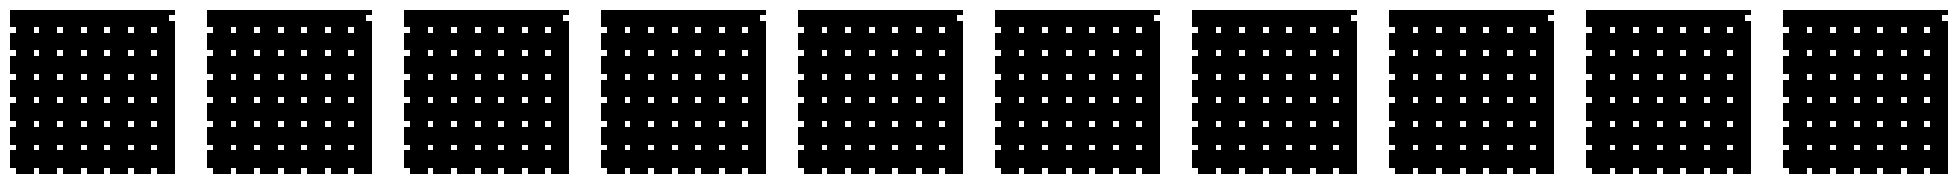

Epoch [81/100], Discriminator Loss: 0.0000, Generator Loss: 22.5234
Epoch [82/100], Discriminator Loss: 0.0000, Generator Loss: 22.5348
Epoch [83/100], Discriminator Loss: 0.0000, Generator Loss: 22.5472
Epoch [84/100], Discriminator Loss: 0.0000, Generator Loss: 22.5637
Epoch [85/100], Discriminator Loss: 0.0000, Generator Loss: 22.5830
Epoch [86/100], Discriminator Loss: 0.0000, Generator Loss: 22.6046
Epoch [87/100], Discriminator Loss: 0.0000, Generator Loss: 22.6303
Epoch [88/100], Discriminator Loss: 0.0000, Generator Loss: 22.6607
Epoch [89/100], Discriminator Loss: 0.0000, Generator Loss: 22.6947
Epoch [90/100], Discriminator Loss: 0.0000, Generator Loss: 22.7330


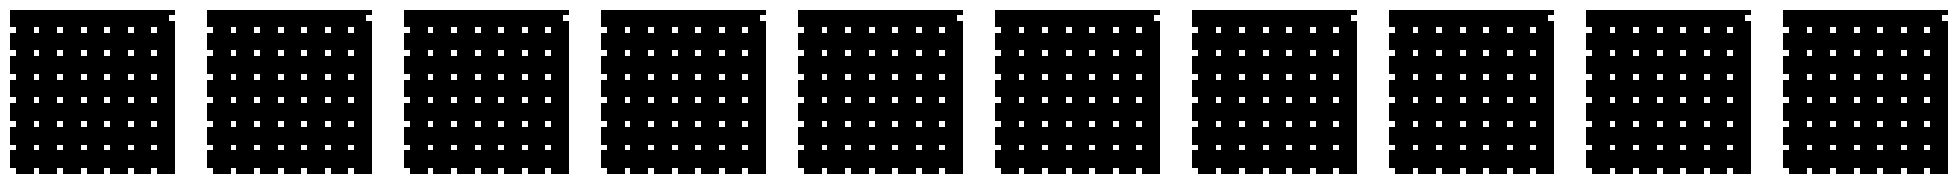

KeyboardInterrupt: 

In [11]:
for epoch in range(NUM_EPOCHS):
    for i, data in enumerate(train_loader): 
        real_images, _ = data
        real_images = real_images.to(device)

        # train discriminator with real images
        discriminator_optimizer.zero_grad()
        real_labels = torch.ones(real_images.size(0), 1).to(device)
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)
        real_loss.backward()

        # train discriminator with fake images
        noise = torch.randn(real_images.size(0), NOISE_DIM).to(device)
        fake_images = generator(noise)
        fake_labels = torch.zeros(real_images.size(0), 1).to(device)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)
        fake_loss.backward()

        discriminator_optimizer.step()

        # train generator
        generator_optimizer.zero_grad()
        fake_labels = torch.ones(real_images.size(0), 1).to(device) # fake labels are real for generator cost
        fake_outputs = discriminator(fake_images)
        gen_loss = criterion(fake_outputs, fake_labels)
        gen_loss.backward()
        generator_optimizer.step()

    # print loss for every epoch
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], '
          f'Discriminator Loss: {real_loss.item()+fake_loss.item():.4f}, '
          f'Generator Loss: {gen_loss.item():.4f}')
    
    # generate images for every 10 epochs
    if (epoch+1) % 10 == 0:
        generate_images(generator, test_noise)
            
